### The Culture of International Relations

#### About this project
Cultural treaties are the bi-lateral and multilateral agreements among states that promote and regulate cooperation and exchange in the fields of life generally call cultural or intellectual. Although it was only invented in the early twentieth century, this treaty type came to be the fourth most common bilateral treaty in the period 1900-1980 (Poast et al., 2010). In this project, we seek to use several (mostly European) states’ cultural treaties as a historical source with which to explore the emergence of a global concept of culture in the twentieth century. Specifically, the project will investigate the hypothesis that the culture concept, in contrast to earlier ideas of civilization, played a key role in the consolidation of the post-World War II international order.

The central questions that interest me here can be divided into two groups: 
- First, what is the story of the cultural treaty, as a specific tool of international relations, in the twentieth century? What was the historical curve of cultural treaty-making? For example, in which political or ideological constellations do we find (the most) use of cultural treaties? Among which countries, in which historical periods? What networks of relations were thereby created, reinforced, or challenged? 
- Second, what is the "culture" addressed in these treaties? That is, what do the two signatories seem to mean by "culture" in these documents, and what does that tell us about the role that concept played in the international system? How can quantitative work on this dataset advance research questions about the history of concepts?

In this notebook, we deal with these treaties in three ways:
1) quantitative analysis of "metadata" about all bilateral cultural treaties signed betweeen 1919 and 1972, as found in the World Treaty Index or WTI (Poast et al., 2010).
    For more on how exactly we define a "cultural treaty" here, and on other principles of selection, see... [add this, using text now in "WTI quality assurance"].
2) network analysis of the system of international relationships created by these treaties (using data from WTI, as above).
3) Text analysis of the complete texts of selected treaties. 

After some set-up sections, the discussion of the material begins at "Part 1," below.

In [1]:
%%html
<style>
.jupyter-widgets { font-size: 8pt; }
.widget-label { font-size: 8pt;}
.widget-vbox .widget-label { width: 60px; }
.widget-dropdown > select { font-size: 8pt; }
.widget-select > select { font-size: 8pt; }
.widget-toggle-buttons .widget-toggle-button { font-size: 8pt; width: 100px; }
</style>

### <span style='color:blue'>**Mandatory Prepare Step**</span>: Setup Notebook and Load and Process Treaty Master Index
The following code cell to be executed once for each user session.

In [1]:
# Code Cell Setup
%load_ext autoreload
%autoreload 2

import os
import warnings
from IPython.display import display, HTML

os.sys.path = os.sys.path if '..' in os.sys.path else os.sys.path + ['..']

warnings.filterwarnings('ignore')

import common.config as config
import common.utility as utility
import common.treaty_state as treaty_state

import party_analysis_gui
import topic_analysis_gui

wti_index = treaty_state.load_wti_index('../data')
%matplotlib inline

print_args = True

2019-01-01 11:55:36,794 : INFO : WTI index loaded!


### Chart: Treaty Quantities by Selected Parties 
This chart displays the number of treaties per time period for each party or group of parties. The time period can be year or one of a predefined set of time period divisions. The default time period division is 1919-1944, 1945-1955, 1956-1966, and 1967-1972, the alternative division has 1940-1944 as an additional period. The third division is a single period between 1945 and 1972 (inclusive)

Several parties can be selected using CTRL + click on left mouse button. Shift-Up/Down can also be used to select consecutive parties. Some predefined party sets exist in the "Preset" dropdown, and, when selected, the corresponding parties is selected in the "Parties" widget. Use the "Top #n" slider to display parties with most treaties for each period. Note that a value greater than 0 will disable the "Parties" widget since these to selections are mutually exclusive. Set slider back to 0 to enable the "Parties" widget.

The treaty count is based on the following rules:
- Treaties outside of selected division are discarded
- When "Is Cultural" is selected than the only treaties included are those having "is cultural" flag in WTI index set to "Yes" 
- When "Topic is 7CULT" is selected than all treaties having topic equal to 7CULT are included using original topic value according to WTI i.e. no recoding!
- Candidate for removal: When "No filter" is selected then no topic filter is applied

The topic filter also restricts the extra category count added when "Other category" or "All category" are selected. When "Other" is selected, than the "complement" count of the sum of all countries not included is added as a category, and the "All" category adds the count of all treaties. Note again, that both these counts are restricted by time period (no treaty outside period), and selected topic filter.

Also note that when several countries are selected, than the count for a given country is the count of all treaties that country signed for each time period (filtered by topic selection). Each of the treaties that are signed *between* two of the selected parties will hence add +1 for each of the two parties.


In [2]:
# Code Cell
party_analysis_gui.display_gui(wti_index, print_args=False)

###  Chart: Treaty Quantities by Selected Topics
This chart displays the number of treaties per selected category and time period. The category can be wither topic or party. Only treaties signed by one of the selected parties are included in the count (unless either of ALL OTHER or ALL is selected, see below).

See previous chart for a description of "period" and "parties" options (the same rules apply in this chart).

Topics **not** specified in the selected "Category" are as default **excluded** from the counts. If the "Add OTHER topics" toggle is set then a new "OTHER" category is added as a summed up count for topics outside the selected topic category. 

Note that, as default when the "Recode 7CORR" is set, all treaties marked as "is_cultural" = "Yes" in the WTI index are assigned a new topic code "7CORR". The remaining treaties ´having topic 7CULT are not recoded (will keep this code).

When the "Chart per Qty" toggle is set, then a seperate chart is created for each category (of selected Quantity). Please not that this might take some time if, if the category selection contains many items. Extra charts will also be created for **excluded** category items (i.e. parties not selected or topics not included in topic category) if either of the "ALL OTHER" or "ALL" party items are selected. In both cases the category filter is applies as for any other chart.

The topic categories are defined in file **.\common\config.py** in the "category_group_settings" and is common to all notebooks. A topic category has the following the structure
```python
category_group_settings = {
    'category-group-name': {
        'category-item-1': [list-of-topic-codes-in-category-1],
        'category-item-2': [list-of-topic-codes-in-category-2],
        ...
        'category-item-n': [list-of-topic-codes-in-category-n]
    },
```
The **category-group-name**s will be visible in the "Category" dropdown list, and it is hence important for these names to be unique. It can be an arbitrary name. The **category-item**s is the name that will be visible on the chart legend as label for associated list of topic-codes. The **list-of-topic-codes**, finally, must be a list of valid topic codes in the WTI-index (+ 7CORR). Note that these lists within the same category-group should be mutually exclusive i.e. the same code should not be added to more than one group (will give an unpredicted result). Also note that correct braces **must** be used, and strings **must** be surrounded by "'", and all topic codes must also be in uppercase. Follow the same syntax as in the existing specifications. 

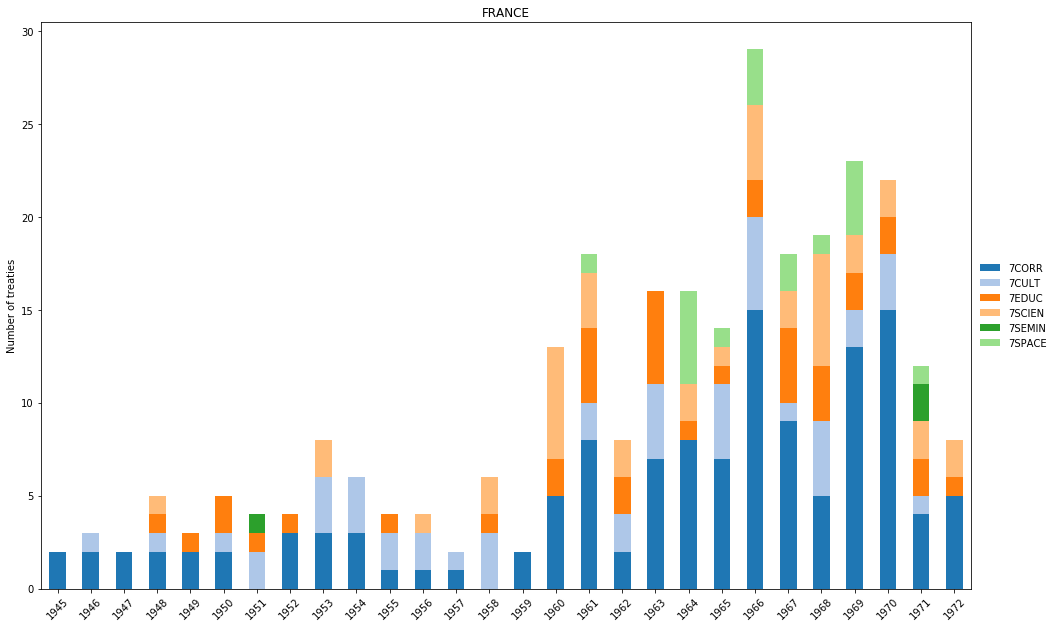

In [5]:
# Code Cell
topic_analysis_gui.display_gui(wti_index, print_args=False)